# How are in-demand skills trending for Data Analysts?

## Methodology

1. Aggregate skill count montly
2. Re-analyze based on persentage ot total jobs
3. Plot the montly skill demand

In [2]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_ID = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Indonesia')].copy()

In [4]:
df_DA_ID['job_posted_month_no'] = df_DA_ID['job_posted_date'].dt.month  # extract month number

df_DA_ID_exploded = df_DA_ID.explode('job_skills')

df_DA_ID_pivot = df_DA_ID_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_ID_pivot.loc['Total'] = df_DA_ID_pivot.sum() 

# sort the columns based on the total occurrences in descending order
df_DA_ID_pivot = df_DA_ID_pivot[df_DA_ID_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_ID_pivot = df_DA_ID_pivot.drop('Total') # drop the Total row

df_DA_ID_pivot

# df_DA_ID_pivot.iloc[:,:5]

job_skills,sql,python,excel,tableau,r,power bi,sas,bigquery,spreadsheet,mysql,...,rust,sass,splunk,slack,scikit-learn,seaborn,terraform,tensorflow,wire,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,19,10,12,7,2,7,0,3,2,4,...,0,0,0,0,0,0,0,0,0,0
2,17,9,6,9,8,7,6,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3,13,9,7,6,4,2,2,2,0,2,...,0,0,0,0,0,0,0,0,0,0
4,13,6,8,4,4,7,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0
5,12,9,5,8,4,5,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
6,14,9,6,6,4,1,0,3,4,0,...,1,1,0,1,0,0,1,1,0,0
7,12,7,10,7,2,2,2,1,2,1,...,0,0,0,0,0,0,0,0,0,0
8,11,14,4,13,6,3,0,6,2,2,...,0,0,0,0,0,0,0,0,0,0
9,13,15,12,5,9,5,6,4,3,1,...,0,0,1,0,0,0,0,0,0,0


<Axes: xlabel='job_posted_month_no'>

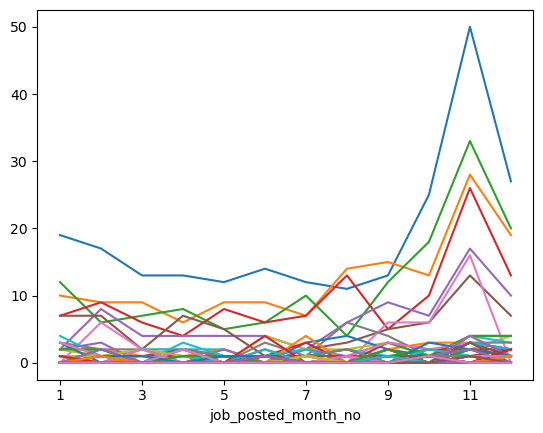

In [5]:
df_DA_ID_pivot.plot(kind='line', legend='')

In [6]:
DA_total = df_DA_ID.groupby('job_posted_month_no').size()

DA_total

job_posted_month_no
1      35
2      25
3      21
4      20
5      25
6      22
7      25
8      32
9      34
10     61
11    106
12     55
dtype: int64

In [7]:
df_DA_ID_percent = df_DA_ID_pivot.div(DA_total/100, axis=0)

df_DA_ID_percent

job_skills,sql,python,excel,tableau,r,power bi,sas,bigquery,spreadsheet,mysql,...,rust,sass,splunk,slack,scikit-learn,seaborn,terraform,tensorflow,wire,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,54.285714,28.571429,34.285714,20.000000,5.714286,20.000000,0.000000,8.571429,5.714286,11.428571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,68.000000,36.000000,24.000000,36.000000,32.000000,28.000000,24.000000,8.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,61.904762,42.857143,33.333333,28.571429,19.047619,9.523810,9.523810,9.523810,0.000000,9.523810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,65.000000,30.000000,40.000000,20.000000,20.000000,35.000000,10.000000,5.000000,5.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,48.000000,36.000000,20.000000,32.000000,16.000000,20.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,63.636364,40.909091,27.272727,27.272727,18.181818,4.545455,0.000000,13.636364,18.181818,0.000000,...,4.545455,4.545455,0.000000,4.545455,0.000000,0.000000,4.545455,4.545455,0.000000,0.000000
7,48.000000,28.000000,40.000000,28.000000,8.000000,8.000000,8.000000,4.000000,8.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,34.375000,43.750000,12.500000,40.625000,18.750000,9.375000,0.000000,18.750000,6.250000,6.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,38.235294,44.117647,35.294118,14.705882,26.470588,14.705882,17.647059,11.764706,8.823529,2.941176,...,0.000000,0.000000,2.941176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
df_DA_ID_percent = df_DA_ID_percent.reset_index()
df_DA_ID_percent['job_posted_month'] = df_DA_ID_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_ID_percent = df_DA_ID_percent.set_index('job_posted_month')
df_DA_ID_percent = df_DA_ID_percent.drop(columns=['job_posted_month_no'])

df_DA_ID_percent

job_skills,sql,python,excel,tableau,r,power bi,sas,bigquery,spreadsheet,mysql,...,rust,sass,splunk,slack,scikit-learn,seaborn,terraform,tensorflow,wire,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.285714,28.571429,34.285714,20.000000,5.714286,20.000000,0.000000,8.571429,5.714286,11.428571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,68.000000,36.000000,24.000000,36.000000,32.000000,28.000000,24.000000,8.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,61.904762,42.857143,33.333333,28.571429,19.047619,9.523810,9.523810,9.523810,0.000000,9.523810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,65.000000,30.000000,40.000000,20.000000,20.000000,35.000000,10.000000,5.000000,5.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,48.000000,36.000000,20.000000,32.000000,16.000000,20.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,63.636364,40.909091,27.272727,27.272727,18.181818,4.545455,0.000000,13.636364,18.181818,0.000000,...,4.545455,4.545455,0.000000,4.545455,0.000000,0.000000,4.545455,4.545455,0.000000,0.000000
Jul,48.000000,28.000000,40.000000,28.000000,8.000000,8.000000,8.000000,4.000000,8.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,34.375000,43.750000,12.500000,40.625000,18.750000,9.375000,0.000000,18.750000,6.250000,6.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,38.235294,44.117647,35.294118,14.705882,26.470588,14.705882,17.647059,11.764706,8.823529,2.941176,...,0.000000,0.000000,2.941176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


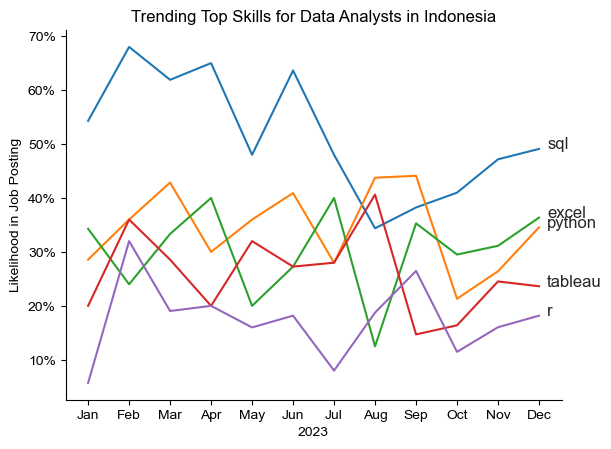

In [ ]:
df_plot = df_DA_ID_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Indonesia')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

# texts = []

for i in range(5):
  # texts.append(plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i]))
  plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y}%'))
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# from adjustText import adjust_text
# adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=2))

In [10]:
df_plot.iloc[-1, 0]

np.float64(49.090909090909086)